## Train a cellpose 2D model 

This notebook shows how to train a Stardist model.  After training go back and load the model into ```napari-easy-augment-batch-dl``` to test the model.  

Before running this notebook a set of patches must exist in the following format.

1.  Ground Truth are put in a directory called ```/ground truth0```
2.  Inputs are put in a directory called ```inputn``` where n is an integer 0...m and represents the channel.  Note:  RGB images may only have one 'channel' directory.
3.  In each of the both directories there exist a set of files of the same names.  For example if in the ```inputn``` directory we have ```apples0```, ```apples1```, ```apples2``` label images of the same name must exist in the ```ground truth``` directory.  

In [1]:
import os
from tnia.plotting.plt_helper import imshow_multi2d
from cellpose import models, io
from pathlib import Path

## Load inputs and ground truth

We load directories called 'input0' and 'ground truth0' which should exist under ```train_path```.  The reason we append '0' to the end of the name is because some of the code that generates image and label sets is meant to work on multiple channels (so the 0 is the channel number)

In [2]:
parent_path = r'D:\images\tnia-python-images\imagesc\2025_04_12_disk_like'

train_path = os.path.join(parent_path, 'patches')

image_patch_path = train_path + '/ground truth0'
label_patch_path = train_path + '/input0'

model_path = os.path.join(parent_path,'models')

if not os.path.exists(model_path):
    os.makedirs(model_path)

if not os.path.exists(image_patch_path):
    print('image_patch_path does not exist')

if not os.path.exists(label_patch_path):
    print('label_patch_path does not exist')

## Use a helper to collect the training data

The helper will also normalize the inputs.

In [3]:
import warnings
warnings.filterwarnings('ignore')

from tnia.deeplearning.dl_helper import collect_training_data
X, Y = collect_training_data(train_path, sub_sample=1, downsample=False, add_trivial_channel=False, relabel=True)

print('Number of input images', len(X))
print('Number of ground truth images ', len(Y))

print('Size of first input image', X[0].shape)
print('Size of first ground truth image ', Y[0].shape)

100%|██████████| 200/200 [00:00<00:00, 325.24it/s]

Number of input images 200
Number of ground truth images  200
Size of first input image (256, 256)
Size of first ground truth image  (256, 256)


## Inspect images

Output training data shapes and plot images to make sure image and label set look OK 

(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0
(256, 256) (256, 256)
0.0 1.0


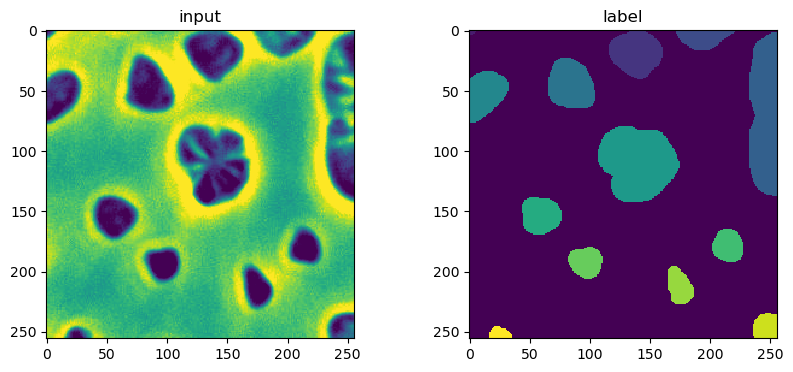

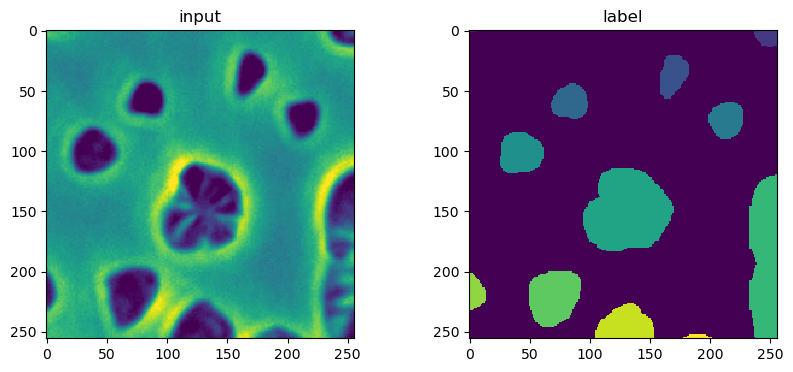

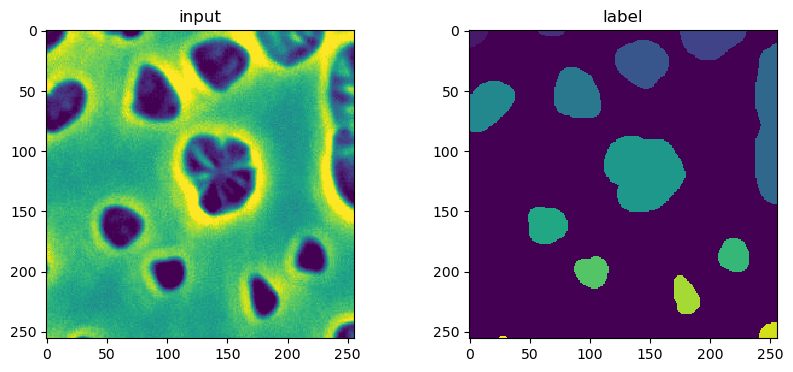

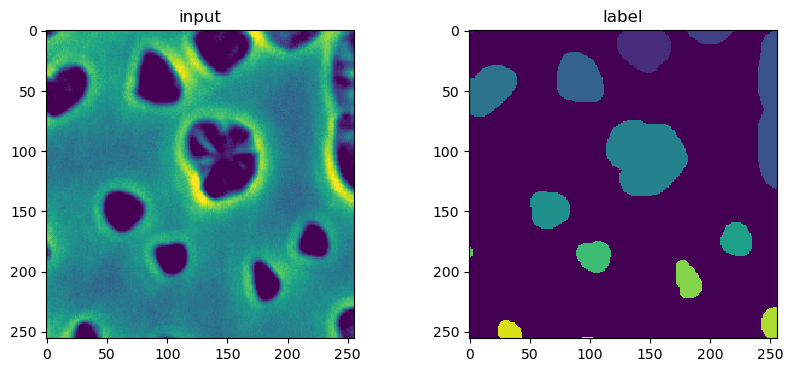

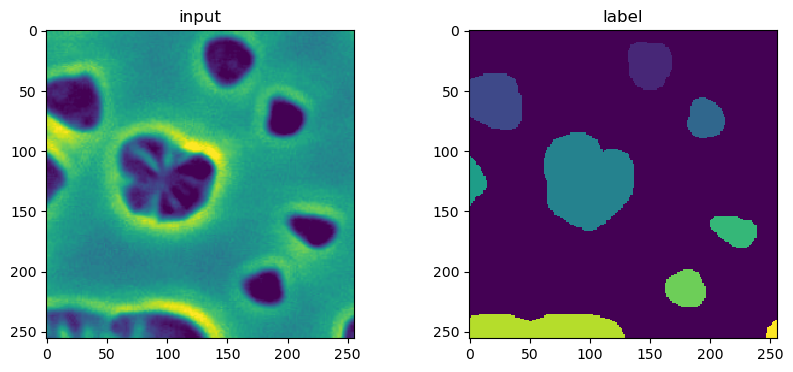

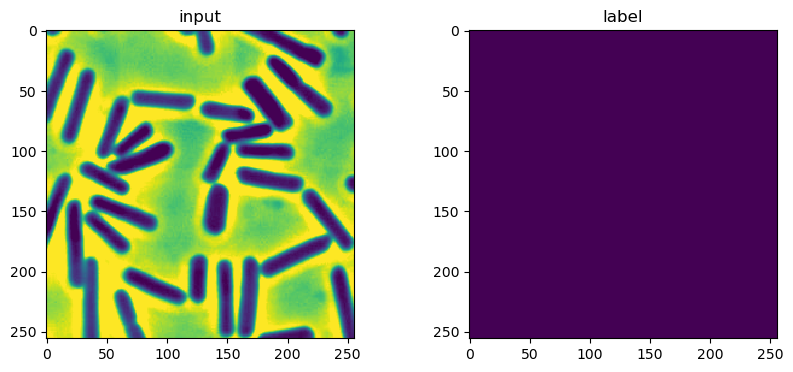

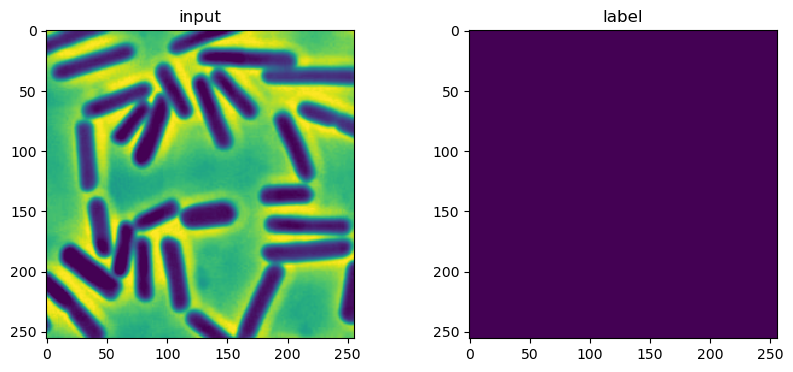

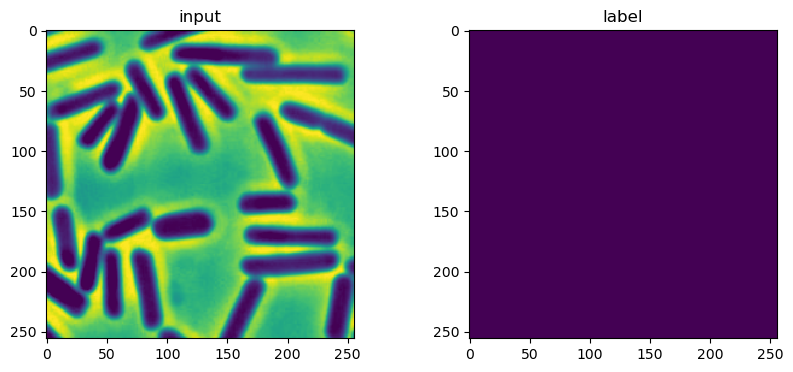

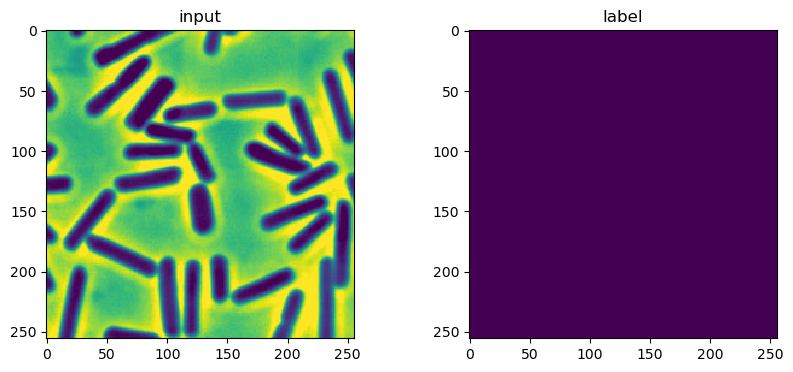

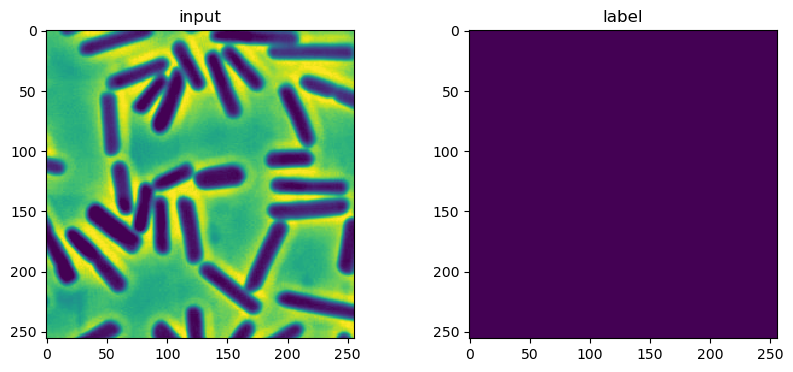

In [4]:
import random
for n in range(5):
    n_rand = n#random.randint(0, len(X)-1)
    print(X[n_rand].shape, Y[n_rand].shape)
    print(X[n_rand].min(), X[n_rand].max())
    fig=imshow_multi2d([X[n_rand], Y[n_rand]], ['input', 'label'], 1,2)
for n in range(100,105):
    n_rand = n#random.randint(0, len(X)-1)
    print(X[n_rand].shape, Y[n_rand].shape)
    print(X[n_rand].min(), X[n_rand].max())
    fig=imshow_multi2d([X[n_rand], Y[n_rand]], ['input', 'label'], 1,2)

## Divide into training and validation sets

Unlike stardist Cellpose does not seem to need numpy arrays as input.  So to create training and validation sets we can simply split the X and Y vectors. 

In [5]:

X_ = X.copy()
Y_ = Y.copy()

# note we don't have a lot of training patches so we will use them for both training and testing (very bad but this is just for proof of concept)

X_train = X_
Y_train = Y_
X_test = X_.copy()
Y_test = Y_.copy()

print('Number of images', len(X_))
print('Number of training images', len(X_train))
print('Number of test images ', len(X_test))



Number of images 200
Number of training images 200
Number of test images  200


In [6]:
X_train[0].shape, Y_train[0].shape

((256, 256), (256, 256))

## Create a cellpose model

In [7]:
import os

rescale = False
 
if rescale==False:
    model_name = 'disks_but_no_rods_rescale_false'
else:
    model_name = 'disks_but_no_rods_rescale_true'
    
# start logger (to see training across epochs)
logger = io.logger_setup()

# DEFINE CELLPOSE MODEL (without size model)
model= models.CellposeModel(gpu=True, model_type=None)#, pretrained_model=os.path.join(model_path,model_name))

print('Model name', model_name)

2025-04-30 07:04:47,490 [INFO] WRITING LOG OUTPUT TO C:\Users\bnort\.cellpose\run.log
2025-04-30 07:04:47,491 [INFO] 
cellpose version: 	3.1.0 
platform:       	win32 
python version: 	3.11.11 
torch version:  	2.6.0
2025-04-30 07:04:47,720 [INFO] ** TORCH CUDA version installed and working. **
2025-04-30 07:04:47,722 [INFO] >>>> using GPU (CUDA)
2025-04-30 07:04:47,805 [INFO] >>>> no model weights loaded
Model name disks_but_no_rods_rescale_false


# Train the model

In [8]:
from cellpose import train

channel_to_segment = 0 
optional_channel = 0

new_model_path = train.train_seg(model.net, X_train, Y_train, 
                              channels=[channel_to_segment,optional_channel], 
                              save_path=parent_path, 
                              n_epochs=100,
                              min_train_masks=0,
                              rescale = rescale,  
                              model_name=model_name,
                              normalize=False)

2025-04-30 07:06:33,389 [INFO] computing flows for labels


 50%|█████     | 100/200 [00:08<00:06, 15.04it/s]

2025-04-30 07:06:41,757 [WARNING] empty masks!
2025-04-30 07:06:41,760 [WARNING] empty masks!
2025-04-30 07:06:41,763 [WARNING] empty masks!
2025-04-30 07:06:41,767 [WARNING] empty masks!
2025-04-30 07:06:41,769 [WARNING] empty masks!
2025-04-30 07:06:41,771 [WARNING] empty masks!
2025-04-30 07:06:41,775 [WARNING] empty masks!
2025-04-30 07:06:41,776 [WARNING] empty masks!
2025-04-30 07:06:41,778 [WARNING] empty masks!
2025-04-30 07:06:41,780 [WARNING] empty masks!
2025-04-30 07:06:41,781 [WARNING] empty masks!
2025-04-30 07:06:41,783 [WARNING] empty masks!
2025-04-30 07:06:41,784 [WARNING] empty masks!
2025-04-30 07:06:41,786 [WARNING] empty masks!
2025-04-30 07:06:41,787 [WARNING] empty masks!
2025-04-30 07:06:41,789 [WARNING] empty masks!
2025-04-30 07:06:41,791 [WARNING] empty masks!
2025-04-30 07:06:41,792 [WARNING] empty masks!
2025-04-30 07:06:41,793 [WARNING] empty masks!
2025-04-30 07:06:41,795 [WARNING] empty masks!
2025-04-30 07:06:41,796 [WARNING] empty masks!
2025-04-30 07

 79%|███████▉  | 158/200 [00:08<00:00, 152.34it/s]

2025-04-30 07:06:41,857 [WARNING] empty masks!
2025-04-30 07:06:41,858 [WARNING] empty masks!
2025-04-30 07:06:41,860 [WARNING] empty masks!
2025-04-30 07:06:41,861 [WARNING] empty masks!
2025-04-30 07:06:41,862 [WARNING] empty masks!
2025-04-30 07:06:41,864 [WARNING] empty masks!
2025-04-30 07:06:41,865 [WARNING] empty masks!
2025-04-30 07:06:41,867 [WARNING] empty masks!
2025-04-30 07:06:41,868 [WARNING] empty masks!
2025-04-30 07:06:41,870 [WARNING] empty masks!
2025-04-30 07:06:41,873 [WARNING] empty masks!
2025-04-30 07:06:41,877 [WARNING] empty masks!
2025-04-30 07:06:41,879 [WARNING] empty masks!
2025-04-30 07:06:41,881 [WARNING] empty masks!
2025-04-30 07:06:41,883 [WARNING] empty masks!
2025-04-30 07:06:41,884 [WARNING] empty masks!
2025-04-30 07:06:41,886 [WARNING] empty masks!
2025-04-30 07:06:41,887 [WARNING] empty masks!
2025-04-30 07:06:41,889 [WARNING] empty masks!
2025-04-30 07:06:41,890 [WARNING] empty masks!
2025-04-30 07:06:41,892 [WARNING] empty masks!
2025-04-30 07

100%|██████████| 200/200 [00:08<00:00, 23.59it/s] 

2025-04-30 07:06:41,928 [INFO] >>> computing diameters



100%|██████████| 200/200 [00:00<00:00, 3920.83it/s]

2025-04-30 07:06:41,982 [INFO] >>> using channels [0, 0]
2025-04-30 07:06:42,043 [INFO] >>> n_epochs=100, n_train=200, n_test=None


2025-04-30 07:06:42,044 [INFO] >>> AdamW, learning_rate=0.00500, weight_decay=0.00001
2025-04-30 07:06:43,775 [INFO] >>> saving model to D:\images\tnia-python-images\imagesc\2025_04_12_disk_like\models\disks_but_no_rods_rescale_false
2025-04-30 07:06:46,930 [INFO] 0, train_loss=1.3428, test_loss=0.0000, LR=0.000000, time 3.16s
2025-04-30 07:06:59,532 [INFO] 5, train_loss=0.6342, test_loss=0.0000, LR=0.002778, time 15.76s
2025-04-30 07:07:12,038 [INFO] 10, train_loss=0.2991, test_loss=0.0000, LR=0.005000, time 28.26s
2025-04-30 07:07:38,066 [INFO] 20, train_loss=0.1977, test_loss=0.0000, LR=0.005000, time 54.29s
2025-04-30 07:08:04,236 [INFO] 30, train_loss=0.1646, test_loss=0.0000, LR=0.005000, time 80.46s
2025-04-30 07:08:30,494 [INFO] 40, train_loss=0.1341, test_loss=0.0000, LR=0.005000, time 106.72s
2025-04-30 07:08:57,056 [INFO] 50, train_loss=0.1443, test_loss=0.0000, LR=0.005000, time 133.28s
2025-04-30 07:09:23,353 [INFO] 60, train_loss=0.1481, test_loss=0.0000, LR=0.005000, tim

## Test network on one of the training images (self prediction)

Self prediction is not a good way to evaluate the 'real' performance of the NN.  However it is good sanity test.  If the self prediction looks wrong something really went bad. 

2025-04-30 07:11:07,808 [INFO] No cell pixels found.


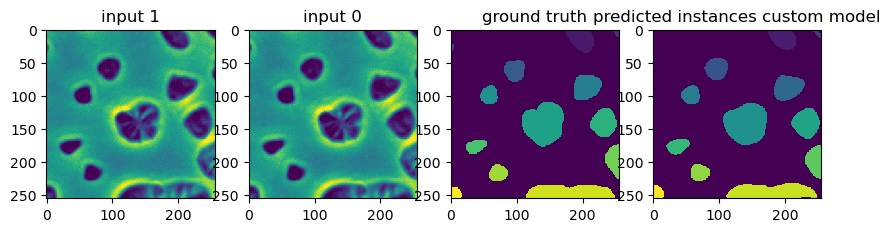

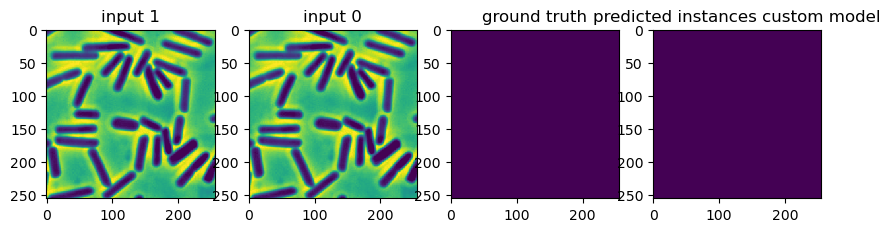

In [9]:

# run model on test images
n=5
masks = model.eval(X_train[n], channels=[channel_to_segment, optional_channel], cellprob_threshold=-1, flow_threshold=0.5, normalize=False)
fig = imshow_multi2d([X_train[n], X_train[n], Y_train[n], masks[0]],['input 1','input 0', 'ground truth','predicted instances custom model'],1,4)
n=115
masks = model.eval(X_train[n], channels=[channel_to_segment, optional_channel], cellprob_threshold=-1, flow_threshold=0.5, normalize=False)
fig = imshow_multi2d([X_train[n], X_train[n], Y_train[n], masks[0]],['input 1','input 0', 'ground truth','predicted instances custom model'],1,4)
